In [1]:
from scipy.stats import chi2_contingency
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs
import pandas as pd
import numpy as np

In [2]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

loader = get_app("load_aligned", moltype="dna")   
omit_degs_cds = get_app("omit_degenerates", moltype="dna", motif_length=3)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
cdsall_process = loader + omit_degs_cds
# result below is only valid alignments (no NotCompleted).
results_cdsall = [r for r in cdsall_process.as_completed(in_dstore[:], parallel=True) if r]
cdsall_alns = concat(results_cdsall)
cdsall_alns.source = "cds_alignments"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm_cds = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_cdsall = sm_cds(cdsall_alns)

lengthstree_cdsall = result_cdsall.lf.get_lengths_as_ens()
humanENS_cdsall = lengthstree_cdsall['Human']

print("Distances: ")
print(lengthstree_cdsall)

result_cdsall.lf


   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.006845847843596009), 'Gorilla': np.float64(0.0085662139860586), 'Human': np.float64(0.004440724419302457)}


GN
log-likelihood = -817632.5312
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.99    2.08    0.76    0.87    1.20
Gorilla       root        0.01    1.22    3.24    0.79    1.18    1.64
Human         root        0.00    1.17    4.05    0.62    1.43    1.74
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
3.24    2.83    1.41    0.92    0.64    2.30
5.13    4.57    1.69    1.32    0.69    3.76
7.54    6.41    1.46    1.15    0.83    3.59
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.23    0.30    0.29    0.19
----------------------------

In [5]:
folder_in = paths.DATA_APES114 + 'intergenicAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

#loading and cocatanating sequences
loader = get_app("load_aligned", moltype="dna")
omit_degs_noncds = get_app("omit_degenerates", moltype="dna")
rename_noncds = libs.renamer_noncds_aligned()
concat = get_app("concat", moltype="dna")

noncds_app = loader + omit_degs_noncds + rename_noncds

results_interAR = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_interAR = concat(results_interAR)
alns_interAR.source = "intergenicAR_alignments"
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intergenicAR = sm(alns_interAR)

lengthstree_intergenicAR = result_intergenicAR.lf.get_lengths_as_ens()
humanENS_interAR = lengthstree_intergenicAR["Human"]

print("Distances: ")
print(lengthstree_intergenicAR)

result_intergenicAR.lf

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.008387216780615851), 'Gorilla': np.float64(0.012639651053809953), 'Human': np.float64(0.007596076136516625)}


GN
log-likelihood = -3638201.6185
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    1.04    3.52    0.89    1.19    1.42
Gorilla       root        0.01    0.93    4.27    0.66    1.22    1.41
Human         root        0.01    0.97    3.95    0.81    1.38    1.47
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.61    6.55    1.46    1.23    0.82    3.56
6.59    6.62    1.41    1.31    0.76    3.98
6.99    7.05    1.42    1.35    0.71    3.77
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.26    0.23    0.23    0.27
----------------------------

In [6]:
folder_in = paths.DATA_APES114 + 'introns/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

loader = get_app("load_aligned", moltype="dna")
omit_degs_noncds = get_app("omit_degenerates", moltype="dna")
rename_noncds = libs.renamer_noncds_aligned()
concat = get_app("concat", moltype="dna")

noncds_app = loader + omit_degs_noncds + rename_noncds
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in noncds_app.as_completed(in_dstore[:], parallel=True) if r]
alns_introns = concat(results_allpos)
alns_introns.source = "introns_alignments"

sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns = sm(alns_introns)

lengthstree_introns = result_introns.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_introns["Human"]

print("Distances: ")
print(lengthstree_introns)

result_introns.lf

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Distances: 
{'Chimpanzee': np.float64(0.0060670500717845705), 'Gorilla': np.float64(0.009924380302001892), 'Human': np.float64(0.005807747117548208)}


GN
log-likelihood = -10543588.5646
number of free parameters = 39
======================================================================
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Chimpanzee    root        0.01    0.98    3.66    0.61    1.02    1.51
Gorilla       root        0.01    1.01    4.67    0.64    1.17    1.64
Human         root        0.01    1.03    4.06    0.60    1.16    1.52
----------------------------------------------------------------------

continued: 
============================================
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.01    6.10    1.39    1.03    0.60    3.43
6.45    6.52    1.65    1.16    0.65    4.58
6.76    6.79    1.55    1.20    0.59    4.01
--------------------------------------------

============================
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

In [39]:
params_interest = ['G>C','C>G','G>A','C>T','G>T','C>A','A>T','T>A','A>G','T>C','A>C']
species_interest = ['Human']
dim = result_intergenicAR.lf.get_used_dimensions('G>T')
subs_rates_dict = result_intergenicAR.lf.get_param_value_dict(dim)
subs_rates_intergenicAR = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_intergenicAR = subs_rates_intergenicAR[params_interest]
Human_subs_rates_intergenicAR = subs_rates_intergenicAR.loc[species_interest]
Human_subs_rates_intergenicAR.index = Human_subs_rates_intergenicAR.index + "_intergenicAR"

In [40]:
dim = result_cdsall.lf.get_used_dimensions('G>T')
subs_rates_dict = result_cdsall.lf.get_param_value_dict(dim)
subs_rates_cds = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_cds = subs_rates_cds[params_interest]
Human_subs_rates_cds = subs_rates_cds.loc[species_interest]
Human_subs_rates_cds.index = Human_subs_rates_cds.index + "_cds"

Human_subs_rates_cdsIGAR = pd.concat([Human_subs_rates_cds, Human_subs_rates_intergenicAR])

Proportion_cdsIGAR = Human_subs_rates_cdsIGAR.loc['Human_cds']/Human_subs_rates_cdsIGAR.loc['Human_intergenicAR']

Human_subs_rates_cdsIGAR

,G>C,C>G,G>A,C>T,G>T,C>A,A>T,T>A,A>G,T>C,A>C
Human_cds,1.463676,1.740417,6.413244,7.539835,1.145410,1.433485,0.617296,0.828122,4.046744,3.585304,1.165722
Human_intergenicAR,1.418767,1.466684,7.052862,6.994255,1.348185,1.384182,0.811173,0.714931,3.950053,3.771058,0.966535


In [41]:
stat, p, dof, expected = chi2_contingency(Human_subs_rates_cdsIGAR)
stat, p

(np.float64(0.15119130686987545), np.float64(0.9999999806817125))

In [42]:
subs_rates_dict = result_introns.lf.get_param_value_dict(dim)
subs_rates_introns = pd.DataFrame.from_dict(subs_rates_dict) 
subs_rates_introns = subs_rates_introns[params_interest]
Human_subs_rates_introns = subs_rates_introns.loc[species_interest]
Human_subs_rates_introns.index = Human_subs_rates_introns.index + "_introns"

Human_subs_rates_intronsIGAR = pd.concat([Human_subs_rates_introns, Human_subs_rates_intergenicAR])

Proportion_intronsIGAR = Human_subs_rates_intronsIGAR.loc['Human_introns']/Human_subs_rates_intronsIGAR.loc['Human_intergenicAR']

Human_subs_rates_intronsIGAR

,G>C,C>G,G>A,C>T,G>T,C>A,A>T,T>A,A>G,T>C,A>C
Human_introns,1.549512,1.523662,6.790284,6.755400,1.197446,1.163130,0.602470,0.590704,4.057879,4.009706,1.028154
Human_intergenicAR,1.418767,1.466684,7.052862,6.994255,1.348185,1.384182,0.811173,0.714931,3.950053,3.771058,0.966535


In [36]:
stat, p, dof, expected = chi2_contingency(Human_subs_rates_intronsIGAR)
stat, p

(np.float64(0.09110105449716012), np.float64(0.9999999984267075))

In [43]:
Proportions_data = pd.concat([Proportion_cdsIGAR.to_frame().T, Proportion_intronsIGAR.to_frame().T])
Proportions_data.index = ['cds_IGAR','introns_IGAR']
Proportions_data

,G>C,C>G,G>A,C>T,G>T,C>A,A>T,T>A,A>G,T>C,A>C
cds_IGAR,1.031653,1.186634,0.909311,1.078004,0.849594,1.035619,0.760992,1.158325,1.024478,0.950742,1.206083
introns_IGAR,1.092154,1.038848,0.962770,0.965850,0.888191,0.840302,0.742715,0.826240,1.027297,1.063284,1.063752


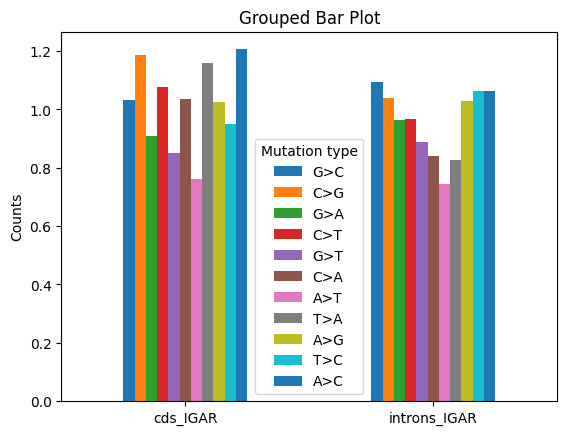

In [44]:
Proportions_data.plot(kind='bar')

plt.ylabel('Counts')
plt.title('Grouped Bar Plot')
plt.xticks(rotation=0)  # keep row labels horizontal
plt.legend(title='Mutation type')
plt.show()